In [233]:
import numpy as np
import random
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [272]:
LOWER_BOUND = -1
UPPER_BOUND = 1

# Import data

In [273]:
DATA_FOLDER = "competition-data/"
DATA_TEST = "test.csv"
DATA_TRAIN = "train.csv"

In [274]:
from proj1_helpers import load_csv_data
y_train, x_train, ids_train = load_csv_data(DATA_FOLDER + DATA_TRAIN, LOWER_BOUND, UPPER_BOUND)
y_test, x_test, ids_test = load_csv_data(DATA_FOLDER + DATA_TEST, LOWER_BOUND, UPPER_BOUND)

In [275]:
x_train

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ...,      nan,      nan,   46.226],
       [     nan,  162.172,  125.953, ...,      nan,      nan,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ...,      nan,      nan,   41.992],
       [  94.951,   19.362,   68.812, ...,      nan,      nan,    0.   ],
       [     nan,   72.756,   70.831, ...,      nan,      nan,    0.   ]])

In [276]:
tx_train = x_train.T
tx_test = x_test.T

# Cleaning data

In [277]:
"""# constants
CATEGORICAL_FIELDS = ['PRI_jet_num']

for c in CATEGORICAL_FIELDS:
    median_rep_data_train[c] = categorical_rep_data(train_data[c])
    median_rep_data_test[c] = categorical_rep_data(test_data[c])"""

"# constants\nCATEGORICAL_FIELDS = ['PRI_jet_num']\n\nfor c in CATEGORICAL_FIELDS:\n    median_rep_data_train[c] = categorical_rep_data(train_data[c])\n    median_rep_data_test[c] = categorical_rep_data(test_data[c])"

In [278]:
mean_train, std_train, tx_train = standardize(tx_train)
tx_test = standardize_predef(tx_test, mean_train, std_train)

In [279]:
tx_train = delete_features(tx_train, 0.7)
tx_train.shape

(19, 250000)

In [280]:
tx_train = replace_nan_by_median(tx_train)
tx_test = replace_nan_by_median(tx_test)

/Users/Joel/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:875: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [281]:
#tx_train = min_max(tx_train)

In [282]:
tx_train, y_train = balance(tx_train.T, y_train, LOWER_BOUND, UPPER_BOUND)

# Logistic Regression

In [283]:
tx_train
tx_train.shape

(19, 171334)

In [80]:
tx_poly = build_poly_tx(tx_train, 2)
tx_poly.shape

(61, 171334)

# Cross Validation

In [20]:
from implementations import build_k_indices
from tqdm import tqdm_notebook
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

def cross_validation_demo():
    model = "ridge_regression"
    seed = 3
    k_fold = 10
    degrees = [9]#np.arange(10, 13, 1)
    lambdas = np.logspace(-4, -2, 20)
    gammas = np.arange(0.0, 1.0, 0.05)
    #initial_w = init_w(tx_train)
    max_iters = 300
    k_indices = build_k_indices(y_train, k_fold, seed)
    results = []
    for degree in tqdm_notebook(degrees):
        tx_poly = build_poly_tx(tx_train, degree)
        initial_w = init_w(tx_poly)
        #for gamma in gammas:
        gamma=0
        for lambda_ in lambdas:
            accs = []
            ws = []
            for k in range(k_fold):
                w_tr, acc = cross_validation(y_train, tx_poly.T, initial_w,
                                             max_iters,  k_indices, k, gamma, lambda_, LOWER_BOUND, UPPER_BOUND, model)
                ws.append(w_tr)
                accs.append(acc)
            w_final = np.mean(ws, axis=0)
            acc_mean = np.mean(accs)
            results.append((degree, gamma, lambda_, acc_mean))

            print("Finished: " + str((degree, gamma, lambda_, acc_mean)))
    
    print(results)
    best_degree, best_gamma, best_lambda, best_acc_mean = max(results, key=lambda x: x[3])
    print("Best accuracy: ",best_acc_mean)
    print("Best degree: ", best_degree)
    print("Best gamma: ", best_gamma)
    print("Best lambda: ", best_lambda)
    #print(w_tr)
    
    return results, w_final

results, w_final = cross_validation_demo()

Finished: (1, 0, 0.0001, 0.74102025331232135)
Finished: (1, 0, 0.00012742749857031334, 0.74103192669118079)
Finished: (1, 0, 0.0001623776739188721, 0.74103192669118079)
Finished: (1, 0, 0.00020691380811147902, 0.7410319266911809)
Finished: (1, 0, 0.00026366508987303583, 0.74105527344889977)
Finished: (1, 0, 0.00033598182862837811, 0.74103192669118068)
Finished: (1, 0, 0.00042813323987193956, 0.7410085799334617)
Finished: (1, 0, 0.00054555947811685203, 0.7409910698651726)
Finished: (1, 0, 0.00069519279617756048, 0.7409910698651726)
Finished: (1, 0, 0.00088586679041008235, 0.74099106986517238)
Finished: (1, 0, 0.0011288378916846883, 0.74099690655460226)
Finished: (1, 0, 0.0014384498882876629, 0.74093270297087477)
Finished: (1, 0, 0.0018329807108324356, 0.74092102959201545)
Finished: (1, 0, 0.0023357214690901212, 0.74102025331232135)
Finished: (1, 0, 0.0029763514416313191, 0.74100274324403193)
Finished: (1, 0, 0.0037926901907322499, 0.74092686628144511)
Finished: (1, 0, 0.0048329302385717

Finished: (7, 0, 0.0078475997035146062, 0.79118659896106924)
Finished: (7, 0, 0.01, 0.79091227455787083)
Finished: (8, 0, 0.0001, 0.7988151520457597)
Finished: (8, 0, 0.00012742749857031334, 0.79889102900834641)
Finished: (8, 0, 0.0001623776739188721, 0.79882682542461914)
Finished: (8, 0, 0.00020691380811147902, 0.7987567851514622)
Finished: (8, 0, 0.00026366508987303583, 0.79866339812058595)
Finished: (8, 0, 0.00033598182862837811, 0.79867507149944561)
Finished: (8, 0, 0.00042813323987193956, 0.79872176501488357)
Finished: (8, 0, 0.00054555947811685203, 0.79841242047510663)
Finished: (8, 0, 0.00069519279617756048, 0.79863421467343731)
Finished: (8, 0, 0.00088586679041008235, 0.79847078736940413)
Finished: (8, 0, 0.0011288378916846883, 0.79848246074826368)
Finished: (8, 0, 0.0014384498882876629, 0.79834821689137914)
Finished: (8, 0, 0.0018329807108324356, 0.798377400338528)
Finished: (8, 0, 0.0023357214690901212, 0.79807389248818073)
Finished: (8, 0, 0.0029763514416313191, 0.7979746687

In [ ]:
acc :0.80430164011
degree :11
lambda_ :0.000335981828628

In [85]:
def poly_ridge(y_train, tx_train, degree, lambda_):
    seed = 1
    k_fold = 10
    k_indices = build_k_indices(y_train, k_fold, seed)
    tx_poly = build_poly_tx(tx_train, degree)
    initial_w = init_w(tx_poly)
    
    for k in range(k_fold):
                w_tr, acc = cross_validation(y_train, tx_poly.T, initial_w,
                                             0,  k_indices, k, 0, lambda_, LOWER_BOUND, UPPER_BOUND, "ridge_regression")
                ws.append(w_tr)
                accs.append(acc)
    return 

[(10, 0, 0.0001, 0.80361291075701868),
 (10, 0, 0.00012742749857031334, 0.8035662172415805),
 (10, 0, 0.0001623776739188721, 0.80347283021070448),
 (10, 0, 0.00020691380811147902, 0.80353119710500209),
 (10, 0, 0.00026366508987303583, 0.80357205393101039),
 (10, 0, 0.00033598182862837811, 0.80358372730986982),
 (10, 0, 0.00042813323987193956, 0.80349034027899369),
 (10, 0, 0.00054555947811685203, 0.80338527986925823),
 (10, 0, 0.00069519279617756048, 0.80327438277009267),
 (10, 0, 0.00088586679041008235, 0.80309928208720005),
 (10, 0, 0.0011288378916846883, 0.80325103601237391),
 (10, 0, 0.0014384498882876629, 0.80326854608066312),
 (10, 0, 0.0018329807108324356, 0.80300589505632414),
 (10, 0, 0.0023357214690901212, 0.80289499795715868),
 (10, 0, 0.0029763514416313191, 0.80290083464658846),
 (10, 0, 0.0037926901907322499, 0.8026148368645305),
 (10, 0, 0.0048329302385717518, 0.80239304266619982),
 (10, 0, 0.0061584821106602603, 0.80206618805813346),
 (10, 0, 0.0078475997035146062, 0.801

240
   degree  gamma    lambda       acc
0       1      0  0.000100  0.741020
1       1      0  0.000127  0.741032
2       1      0  0.000162  0.741032
3       1      0  0.000207  0.741032
4       1      0  0.000264  0.741055


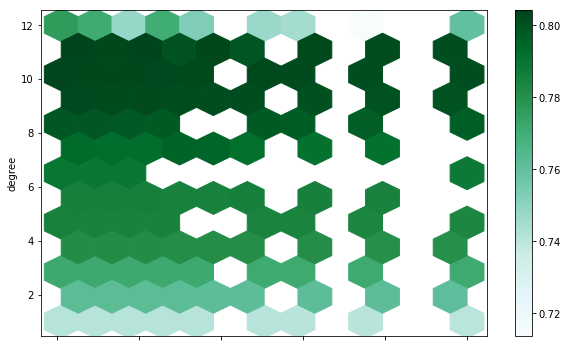

In [228]:
# print some plots with results

import collections
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import scipy.interpolate as interp


def show_acc_mean_by_degree(results, num_lambdas, num_degrees):
    
    
    degrees = np.array([int(i[0]) for i in results])
    gammas = np.array([float(i[1]) for i in results])
    lambdas = np.array([float(i[2]) for i in results])
    accs = np.array([float(i[3]) for i in results])
    
    
    # degree - acc_mean
    dct_d = collections.defaultdict(float)
    for d, g, l, a in results:
        dct_d[d] += a
        
    for k in dct_d.keys():
        dct_d[k] = dct_d[k]/num_lambdas
        
    # lambdas - acc_mean
    dct_l = collections.defaultdict(float)
    for d, g, l, a in results:
        dct_l[l] += a
        
    for k in dct_l.keys():
        dct_l[k] = dct_l[k]/num_degrees
        
    dct_l_o = collections.OrderedDict(sorted(dct_l.items()))
    
    """fig = plt.subplots(1, 1, figsize=(10,5))
    plt.plot(list(dct_d.keys()), list(dct_d.values()), marker=".", color='b', label='accuracy')
    #plt.axhline(y=acc_mean, color='r', label='mean')
    #ax = plt.gca()
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel("degree")
    plt.ylabel("mean accuracy among all lambdas")
    plt.title("ridge regression")
    plt.legend(loc=2)
    plt.grid(True)
    plt.show()
    
    fig = plt.subplots(1, 1, figsize=(10,5))
    plt.plot(list(dct_l_o.keys()), list(dct_l_o.values()), marker=".", color='b', label='accuracy')
    #plt.axhline(y=acc_mean, color='r', label='mean')
    #ax = plt.gca()
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel("lambda")
    plt.ylabel("mean accuracy among all degrees")
    plt.xlim(0.0001, 0.001)
    plt.title("ridge regression")
    plt.legend(loc=2)
    plt.grid(True)
    plt.show()"""

    print(len(degrees))
    
    """fig = plt.figure()
    ax = fig.gca()
    """
    """# Make data.
    X = degrees
    Y = lambdas
    X, Y = np.meshgrid(X, Y)
    Z = accs

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0.7, 0.85)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()"""
    
    
    """print(accs.reshape(20,12).shape)
    gif, ax1 = plt.subplots(1, 1, figsize=(10,20))
    
    ax1.imshow(accs.reshape(20,12), cmap='hot', interpolation='none', extent=[0, 100, 0, 100])
    ax1.set_xticklabels(lambdas)
    plt.show()"""
    
    import pandas as pd
    
    #print(results)
    df = pd.DataFrame.from_records(results, columns=['degree', 'gamma', 'lambda', 'acc'])
    print(df.head())
    
    df.plot.hexbin(x='lambda', y='degree', C='acc', gridsize=12, figsize=(10,6))
    plt.show()
    
    return df
    
df = show_acc_mean_by_degree(results, 20, 12)

In [189]:
df_9 = df[df['degree'] == 9]
info_ridge_9 = df_9.loc[df_9['acc'].idxmax()]
 
df_10 = df[df['degree'] == 10]
info_ridge_10 = df_10.loc[df_10['acc'].idxmax()]

df_11 = df[df['degree'] == 11]
info_ridge_11 = df_11.loc[df_11['acc'].idxmax()]
info_ridge_11


w_ridge_9, l_ridge_9 = ridge_regression(y_train, build_poly_tx(tx_train, 9), info_ridge_9['lambda'])
w_ridge_10, l_ridge_10 = ridge_regression(y_train, build_poly_tx(tx_train, 10), info_ridge_10['lambda'])
w_ridge_11, l_ridge_11 = ridge_regression(y_train, build_poly_tx(tx_train, 11), info_ridge_11['lambda'])

y_pred_ridge_9_test = predict_labels(w_ridge_9, build_poly_tx(tx_test, 9).T, LOWER_BOUND, UPPER_BOUND)
y_pred_ridge_10_test = predict_labels(w_ridge_10, build_poly_tx(tx_test, 10).T, LOWER_BOUND, UPPER_BOUND)
y_pred_ridge_11_test = predict_labels(w_ridge_11, build_poly_tx(tx_test, 11).T, LOWER_BOUND, UPPER_BOUND)



In [190]:
y_pred_mean_test = np.mean((y_pred_ridge_9_test, y_pred_ridge_10_test, y_pred_ridge_11_test), axis=0)

In [203]:
y_pred_ridge_9_train = np.dot(build_poly_tx(tx_train, 9).T, w_ridge_9)
y_pred_ridge_10_train = np.dot(build_poly_tx(tx_train, 10).T, w_ridge_10)
y_pred_ridge_11_train = np.dot(build_poly_tx(tx_train, 11).T, w_ridge_11)
y_pred_ridge_9_train

array([[ 0.76524083],
       [-0.26564827],
       [-0.02983942],
       ..., 
       [-0.58203862],
       [ 0.70751401],
       [ 0.69718882]])

In [227]:
y_pred_mean_train = np.stack((y_pred_ridge_9_train.flatten(), y_pred_ridge_10_train.flatten(), y_pred_ridge_11_train.flatten())).T.mean(axis=1)[:,np.newaxis]

threshold = (UPPER_BOUND + LOWER_BOUND)/2
y_pred_mean_train[np.where(y_pred_mean_train <= threshold)] = -1
y_pred_mean_train[np.where(y_pred_mean_train > threshold)] = 1
print(y_pred_mean_train)

[[ 1.]
 [-1.]
 [-1.]
 ..., 
 [-1.]
 [ 1.]
 [ 1.]]


In [226]:
#y_pred_mean_train = np.mean([y_pred_ridge_9_train, y_pred_ridge_10_train, y_pred_ridge_11_train], axis=0)
np.mean(y_train == y_pred_mean_train)

0.80488986424177333

In [284]:
def cross_validation_demo():
    model = "ridge_regression"
    seed = 3
    k_fold = 2
    degrees = [4, 7, 9, 9]
    lambdas = [0.002, 0.001, 0.001, 0.01]
    k_indices = build_k_indices(y_train, k_fold, seed)
    results = []
    for i in tqdm_notebook(range(4)):
        tx_poly = build_poly_tx(tx_train, degrees[i])
        initial_w = init_w(tx_poly)
        
        accs = []
        ws = []
        for k in range(k_fold):
            w_tr, acc = cross_validation(y_train, tx_poly.T, initial_w,
                                         0,  k_indices, k, 0, lambdas[i], LOWER_BOUND, UPPER_BOUND, model)
            ws.append(w_tr)
            accs.append(acc)
        w_final = np.mean(ws, axis=0)
        acc_mean = np.mean(accs)
        results.append((degrees[i], 0, lambdas[i], acc_mean))

        print("Finished: " + str((degrees[i], 0, lambdas[i], acc_mean)))
    
    print(results)
    best_degree, best_gamma, best_lambda, best_acc_mean = max(results, key=lambda x: x[3])
    print("Best accuracy: ",best_acc_mean)
    print("Best degree: ", best_degree)
    print("Best gamma: ", best_gamma)
    print("Best lambda: ", best_lambda)
    #print(w_tr)
    
    return results, w_final

cross_validation_demo()

Finished: (4, 0, 0.002, 0.76064295469667431)
Finished: (7, 0, 0.001, 0.76694059556188499)
Finished: (9, 0, 0.001, 0.77744639125917803)
Finished: (9, 0, 0.01, 0.77643666756160479)

[(4, 0, 0.002, 0.76064295469667431), (7, 0, 0.001, 0.76694059556188499), (9, 0, 0.001, 0.77744639125917803), (9, 0, 0.01, 0.77643666756160479)]
Best accuracy:  0.777446391259
Best degree:  9
Best gamma:  0
Best lambda:  0.001


([(4, 0, 0.002, 0.76064295469667431),
  (7, 0, 0.001, 0.76694059556188499),
  (9, 0, 0.001, 0.77744639125917803),
  (9, 0, 0.01, 0.77643666756160479)],
 array([[  1.04256406e-01],
        [ -3.47973345e-01],
        [ -3.26442244e-02],
        [  8.57372556e-02],
        [ -1.72984135e-03],
        [ -8.85683488e-03],
        [  2.26301711e-03],
        [ -2.40674402e-04],
        [  1.19818374e-05],
        [ -2.29616796e-07],
        [  5.32747682e-02],
        [ -3.63608858e-01],
        [ -1.71389306e-01],
        [  1.58144671e-01],
        [ -3.98916753e-02],
        [  4.79002717e-03],
        [ -3.01622680e-04],
        [  9.59431776e-06],
        [ -1.21515994e-07],
        [  1.19601295e-01],
        [  7.18853102e-02],
        [ -4.59537105e-02],
        [  3.20801647e-02],
        [ -1.25802591e-02],
        [  2.70955051e-03],
        [ -3.30415762e-04],
        [  2.16633929e-05],
        [ -5.94238436e-07],
        [  1.93811945e-01],
        [  5.91233271e-02],
        

# Predict labels

In [35]:
from proj1_helpers import predict_labels_kaggle

In [46]:
y_pred = predict_labels_kaggle(w_final, tx_test.T, LOWER_BOUND, UPPER_BOUND)

# Submission

In [47]:
from proj1_helpers import create_csv_submission

In [48]:
create_csv_submission(ids_test, y_pred, "test11.csv")

Test n : algorithm / features / y / w
- - - - - - - - - - - - - - - - - - - 
Test 1 : least_squares / all features standardized / y = -1,1 / random init_w

Test 2 : least_squares / corr > 0.1 features standardized / y = -1,1 / random init_w

Test 3 : least_squares_GD(10000,0.5) / all features standardized / y = -1,1 / random init_w

Test 4 : least_squares_GD(10000,0.5) / all features standardized / y = -1,1 / random init_w / poly, degree=1

Test 5 : least_squares / all features standardized / y = -1,1 / random init_w / median + categorical

Test 6 : logistic_regressoin  /all features standardized / y = 0,1 / random init_w / median + categorical + balanced

Test 7 : least_squares / all features standardized / y = 0,1 / random init_w

Test 8 : Test 1

Test 9 : Test 1

Test 10 : Test 1 / standardized test_set with mean and std from train_set

Test 11 : Test 1 / standardized test_set with mean and std from train_set / balance

## Further work

- balance output (batch numpy)
- median and category
- features engineering : features d'intéraction
- logistic regression 